In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()


## Load Tidy Data

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
study_name = 'Cortex-OLF-Exc'
mc_inte_tidy_data = pd.read_msgpack(
    f'/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/{study_name}/Integration/mc_cell_tidy_data.with_integration_info.msg'
)
cell_tidy_data = cell_tidy_data.reindex(mc_inte_tidy_data.index).copy()
cell_tidy_data['aggumap_0'] = mc_inte_tidy_data['aggumap_0']
cell_tidy_data['aggumap_1'] = mc_inte_tidy_data['aggumap_1']

atac_inte_tidy_data = pd.read_msgpack(
    f'/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/{study_name}/Integration/atac_cell_tidy_data.with_integration_info.msg'
)

In [5]:
atac_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/ATAC/Metadata/ATAC.cell_tidy_data.v2.msg'
)
atac_subtype_palette = atac_tidy_data.set_index('SubType')['L3Color'].to_dict()

In [6]:
atac_inte_tidy_data.head()

,Modality,leiden,umap_0,umap_1,pca_0,pca_1,tsne_0,tsne_1,SubType,co_cluster
Glutamate.AON.ANO2+0,atac,14,-8.779590,-8.182286,0.284128,0.124759,12.530191,-45.204778,Glutamate.AON.ANO2,14
Glutamate.AON.ANO2+1,atac,14,-6.953948,-7.023514,0.348753,0.135922,4.959093,-46.154594,Glutamate.AON.ANO2,14
Glutamate.AON.ANO2+11,atac,14,-7.313204,-7.917233,0.284515,0.117754,7.219298,-44.173244,Glutamate.AON.ANO2,14
Glutamate.AON.ANO2+13,atac,14,-6.205024,-5.698394,0.413914,0.122619,4.273670,-54.354505,Glutamate.AON.ANO2,14
Glutamate.AON.ANO2+14,atac,14,-8.590245,-8.332944,0.286412,0.122292,12.026508,-45.087584,Glutamate.AON.ANO2,14


In [12]:
cell_tidy_data.shape, atac_inte_tidy_data.shape

((25522, 56), (2606, 10))

## Plot

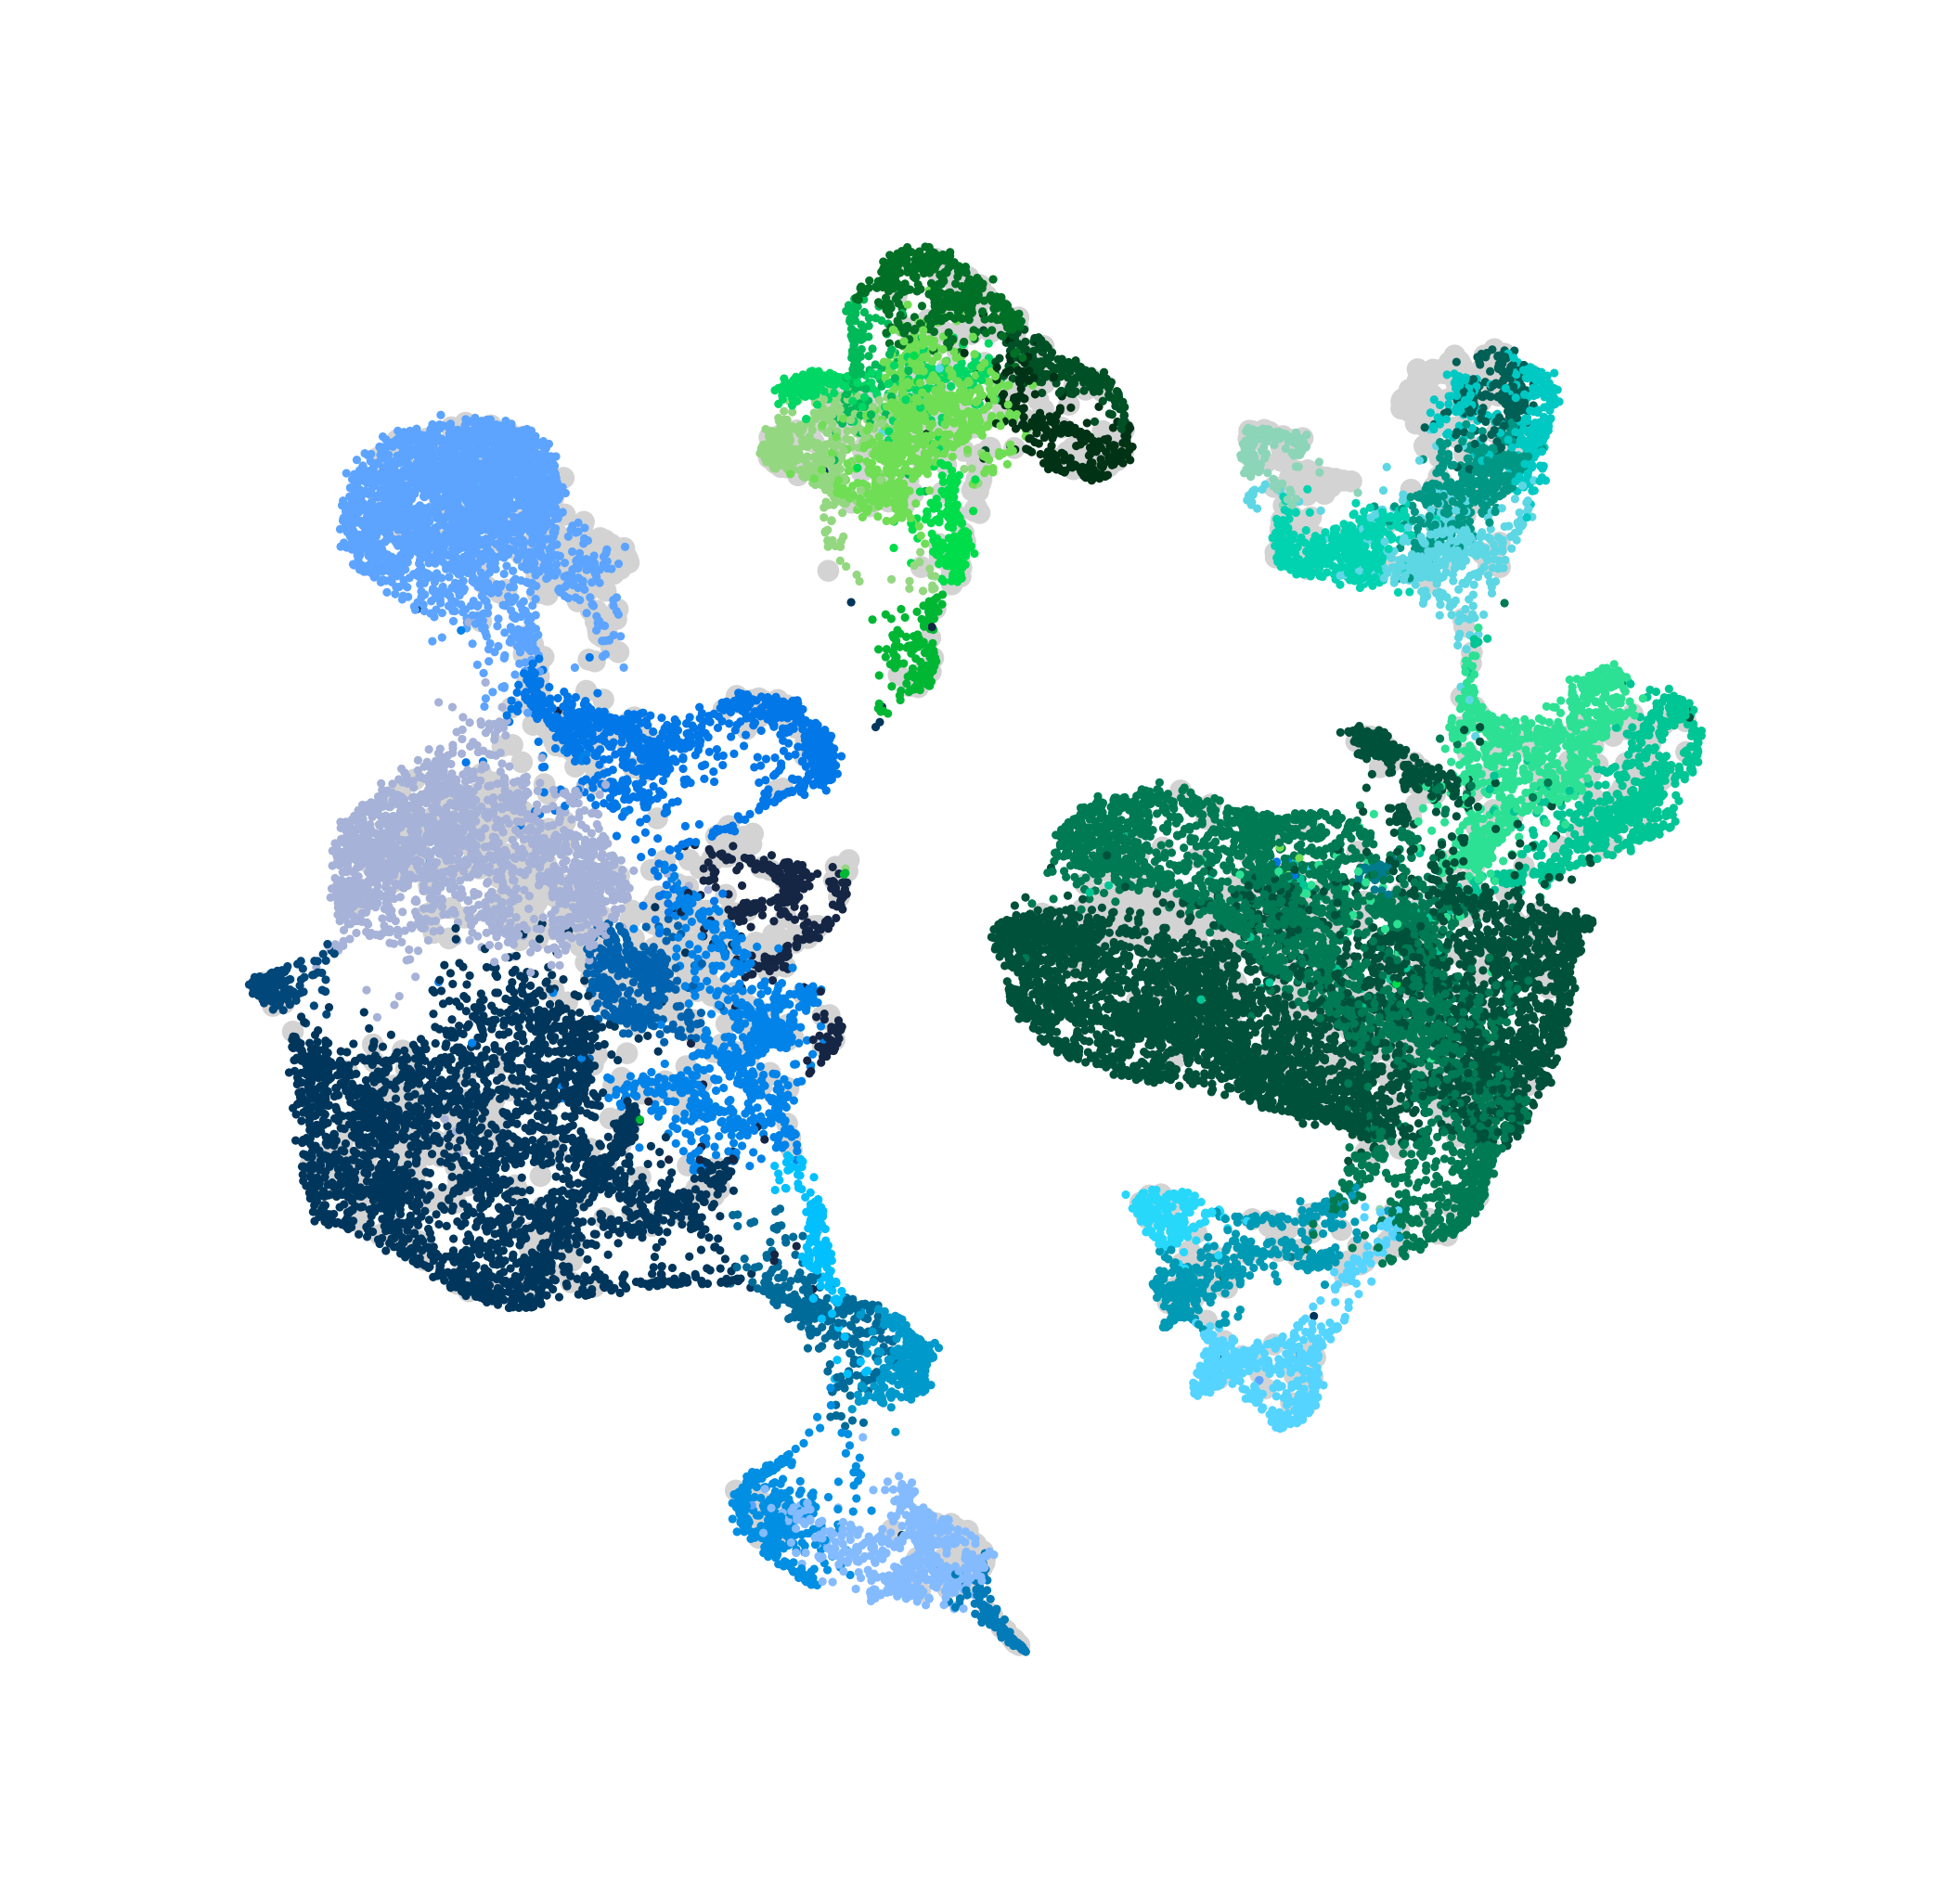

In [7]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax, data=atac_inte_tidy_data, coord_base='umap', 
                    hue=None, scatter_kws=dict(color='lightgray'),
                    max_points=None, s=2, axis_format=None)

categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='aggumap', 
                    hue='SubType', palette=sub_type_palette,
                    max_points=None, s=0.3, axis_format=None)
fig.savefig(f'{study_name}.mc_subtype.png')
pass

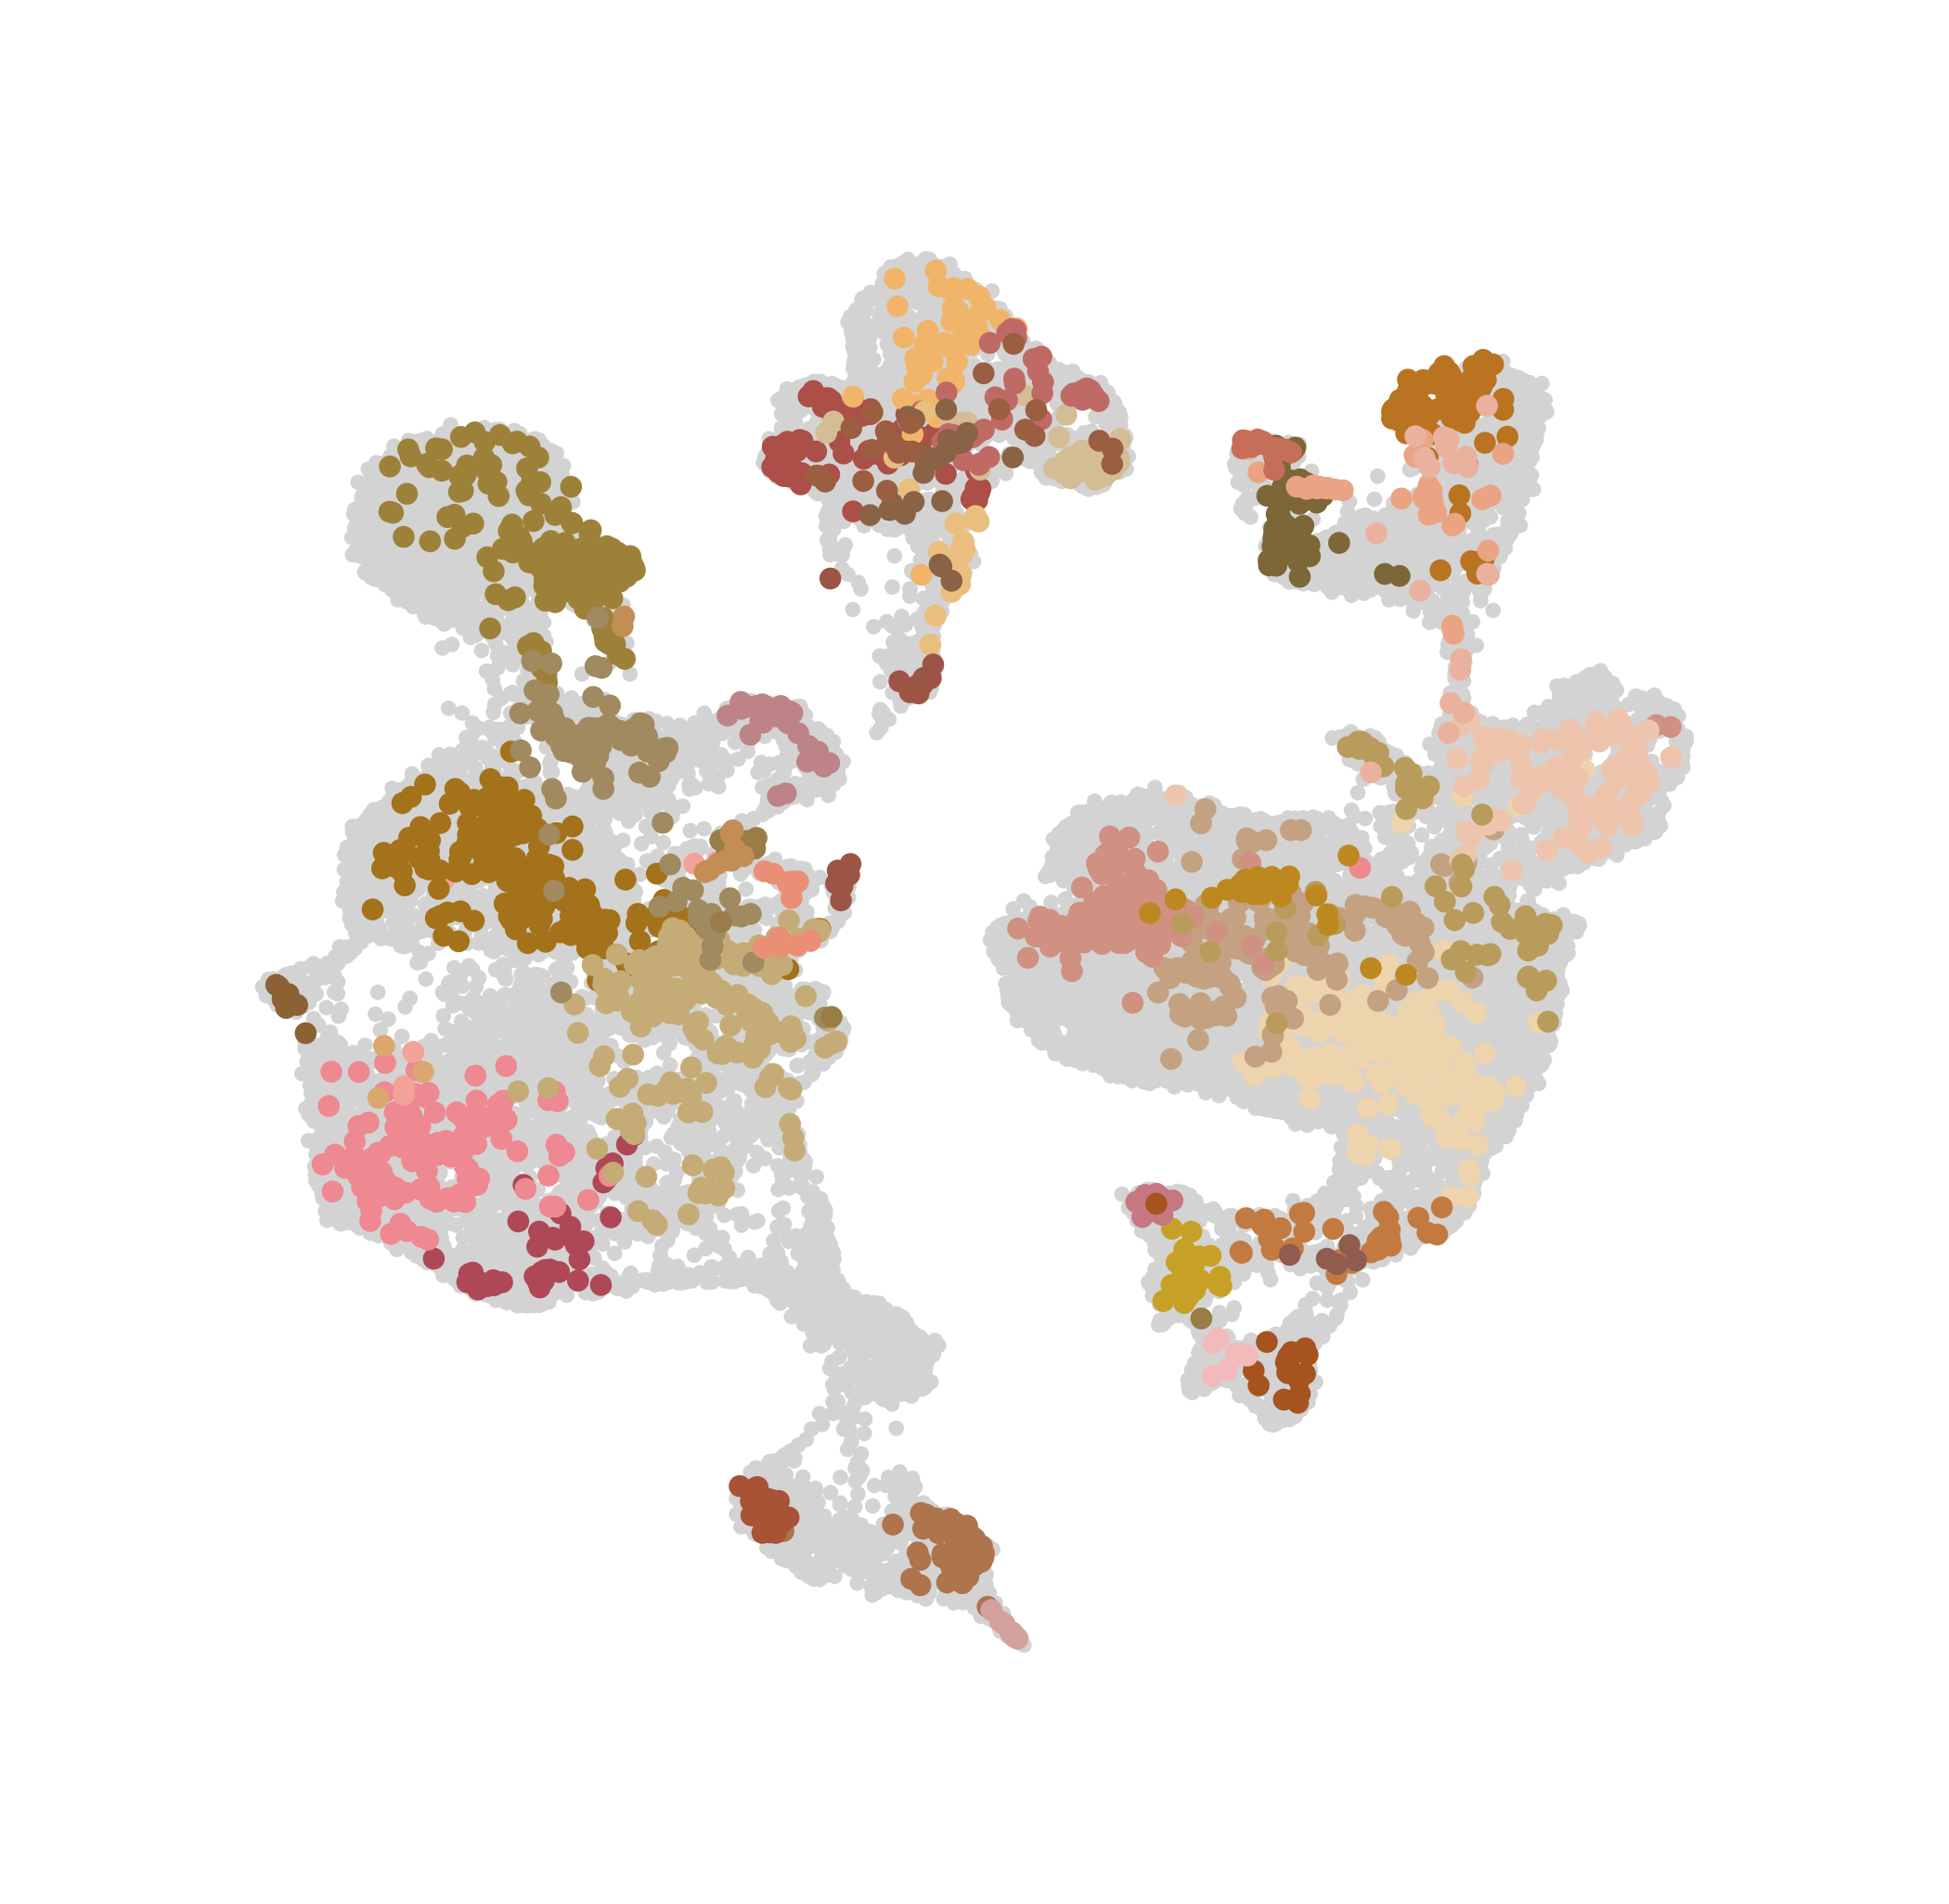

In [9]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='aggumap', 
                    hue=None, scatter_kws=dict(color='lightgray'),
                    max_points=None, s=1, axis_format=None)

categorical_scatter(ax=ax, data=atac_inte_tidy_data, coord_base='umap', 
                    hue='SubType', palette=atac_subtype_palette,
                    max_points=None, s=2, axis_format=None)
fig.savefig(f'{study_name}.atac_subtype.png')


In [10]:
from cemba_data.tools.integration.utilities import calculate_direct_confusion

In [11]:
cfm = calculate_direct_confusion(mc_inte_tidy_data[['SubType', 'co_cluster']], 
                                 atac_inte_tidy_data[['SubType', 'co_cluster']])

In [12]:
cfm.to_csv(f'{study_name}.cfm.csv')

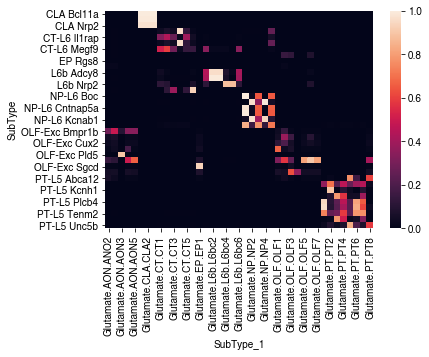

In [13]:
sns.heatmap(cfm)